# Random Forest experiments on `synthetic_faults_dataset.csv`

This notebook runs four Random Forest experiments using different subsets of features.

### Generate dataset

In [1]:
from dataset_generator import dataset_generator
dataset_generator()

✅ Dataset sauvegardé : synthetic_faults_dataset.csv (150 lignes)


In [2]:
import pandas as pd

from random_forest import run_random_forest_experiment

df = pd.read_csv('data/synthetic_faults_dataset.csv')
df.head()

,Ux_max,Uy_max,Uz_max,Ux_min,Uy_min,Uz_min,Ux_range,Uy_range,Uz_range,Ux_Uz_ratio,...,LOS_max,label,phys_strike,phys_dip,phys_length,phys_rake,phys_slip,phys_top_depth,phys_bottom_depth,phys_opening
0,0.013970,0.001951,0.001642,-0.057701,-0.062407,-0.213023,0.071671,0.064358,0.214665,0.333873,...,0.006155,faille_normale,0.0,56.464405,6575.946832,-90.0,0.682211,1317.324774,4270.964398,0.0
1,0.007764,0.001040,0.001082,-0.058858,-0.052203,-0.179261,0.066623,0.053243,0.180343,0.369420,...,0.003229,faille_normale,0.0,59.376823,5187.936056,-90.0,0.913418,1945.494141,4150.324556,0.0
2,0.003285,0.000390,0.000633,-0.037792,-0.027946,-0.096858,0.041077,0.028336,0.097491,0.421336,...,0.001158,faille_normale,0.0,63.751751,5644.474599,-90.0,0.654436,1888.394957,3213.108175,0.0
3,0.017907,0.003617,0.005600,-0.021038,-0.047353,-0.154914,0.038945,0.050969,0.160514,0.242628,...,0.011997,faille_normale,0.0,42.613879,3101.091987,-90.0,0.866096,1667.235126,5610.036445,0.0
4,0.002235,0.000226,0.000715,-0.048043,-0.031030,-0.106848,0.050278,0.031256,0.107563,0.467429,...,0.000777,faille_normale,0.0,69.358550,6995.792821,-90.0,0.569183,1670.793764,3354.823278,0.0


## A. All features (physical parameters + Ux, Uy, Uz + LOS)


=== A - all features ===
Classes: ['faille_normale' 'intrusion_cisaillee' 'intrusion_ouverte']
Confusion matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Classification report:

                     precision    recall  f1-score   support

     faille_normale       1.00      1.00      1.00        15
intrusion_cisaillee       0.94      1.00      0.97        15
  intrusion_ouverte       1.00      0.93      0.97        15

           accuracy                           0.98        45
          macro avg       0.98      0.98      0.98        45
       weighted avg       0.98      0.98      0.98        45



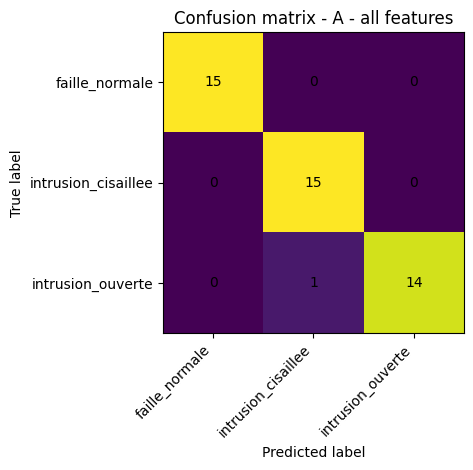


Top 10 features:
phys_slip            0.230
phys_opening         0.093
Uz_max               0.081
Uy_max               0.075
LOS_max              0.074
Ux_Uz_ratio          0.067
Uy_Uz_ratio          0.066
phys_dip             0.063
Ux_min               0.046
Ux_max               0.038


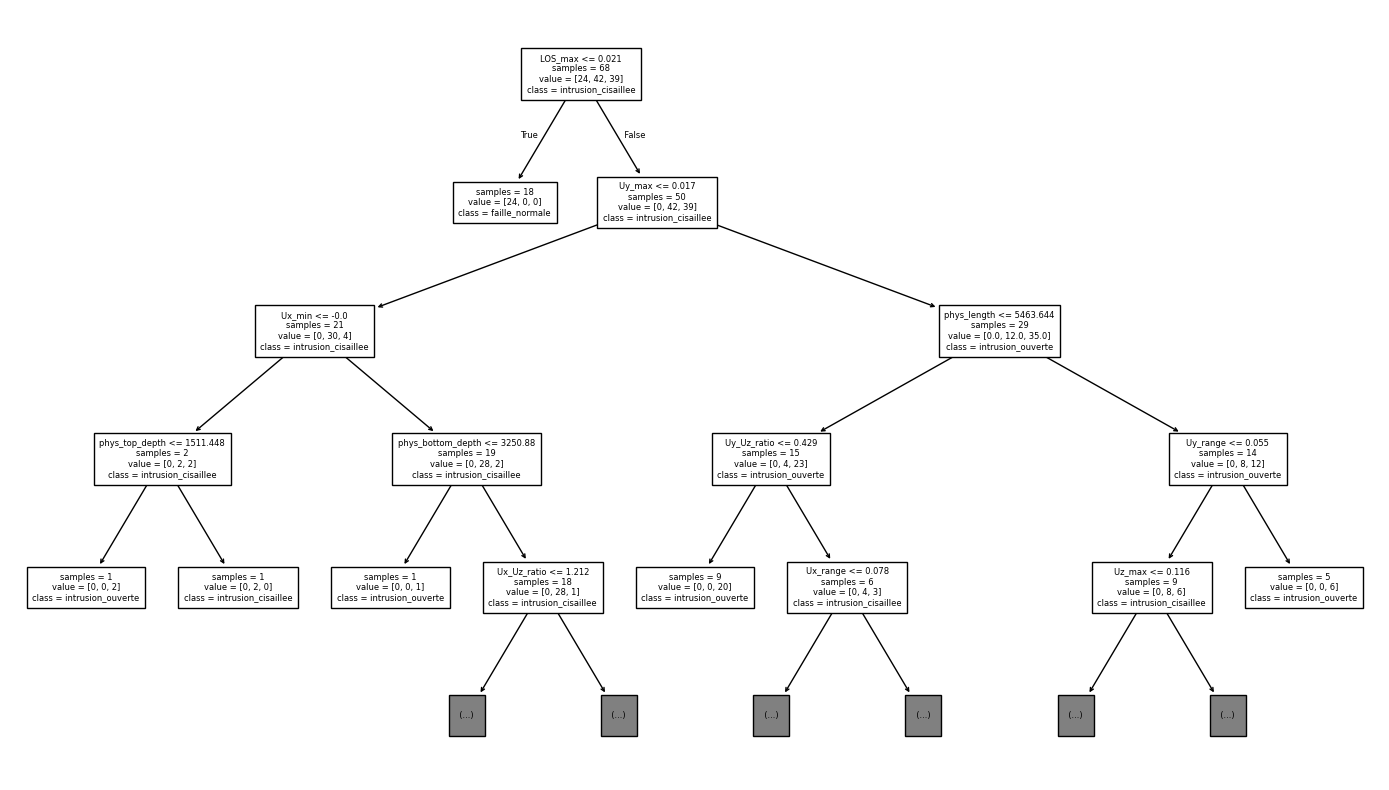

In [3]:
X = df.drop(columns=['label'])
y = df['label']

rf_A, res_A = run_random_forest_experiment(
    X, y, experiment_name='A - all features'
)


## B. Displacement (Ux, Uy, Uz) + LOS (no physical input parameters)


=== B - disp + LOS ===
Classes: ['faille_normale' 'intrusion_cisaillee' 'intrusion_ouverte']
Confusion matrix:
 [[15  0  0]
 [ 0 11  4]
 [ 0  3 12]]

Classification report:

                     precision    recall  f1-score   support

     faille_normale       1.00      1.00      1.00        15
intrusion_cisaillee       0.79      0.73      0.76        15
  intrusion_ouverte       0.75      0.80      0.77        15

           accuracy                           0.84        45
          macro avg       0.85      0.84      0.84        45
       weighted avg       0.85      0.84      0.84        45



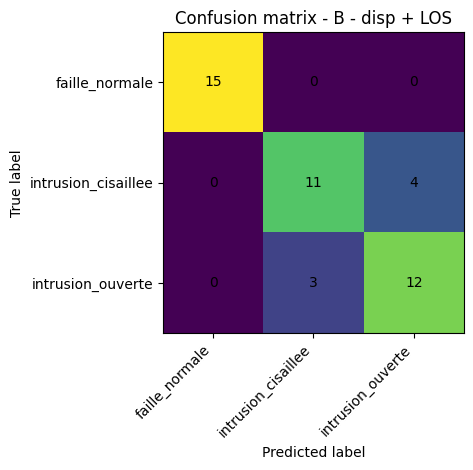


Top 10 features:
Uy_max               0.135
LOS_max              0.120
Uz_max               0.107
Uy_Uz_ratio          0.104
Ux_Uz_ratio          0.102
Ux_max               0.077
Uz_min               0.066
Ux_min               0.063
Ux_range             0.046
Uy_min               0.042


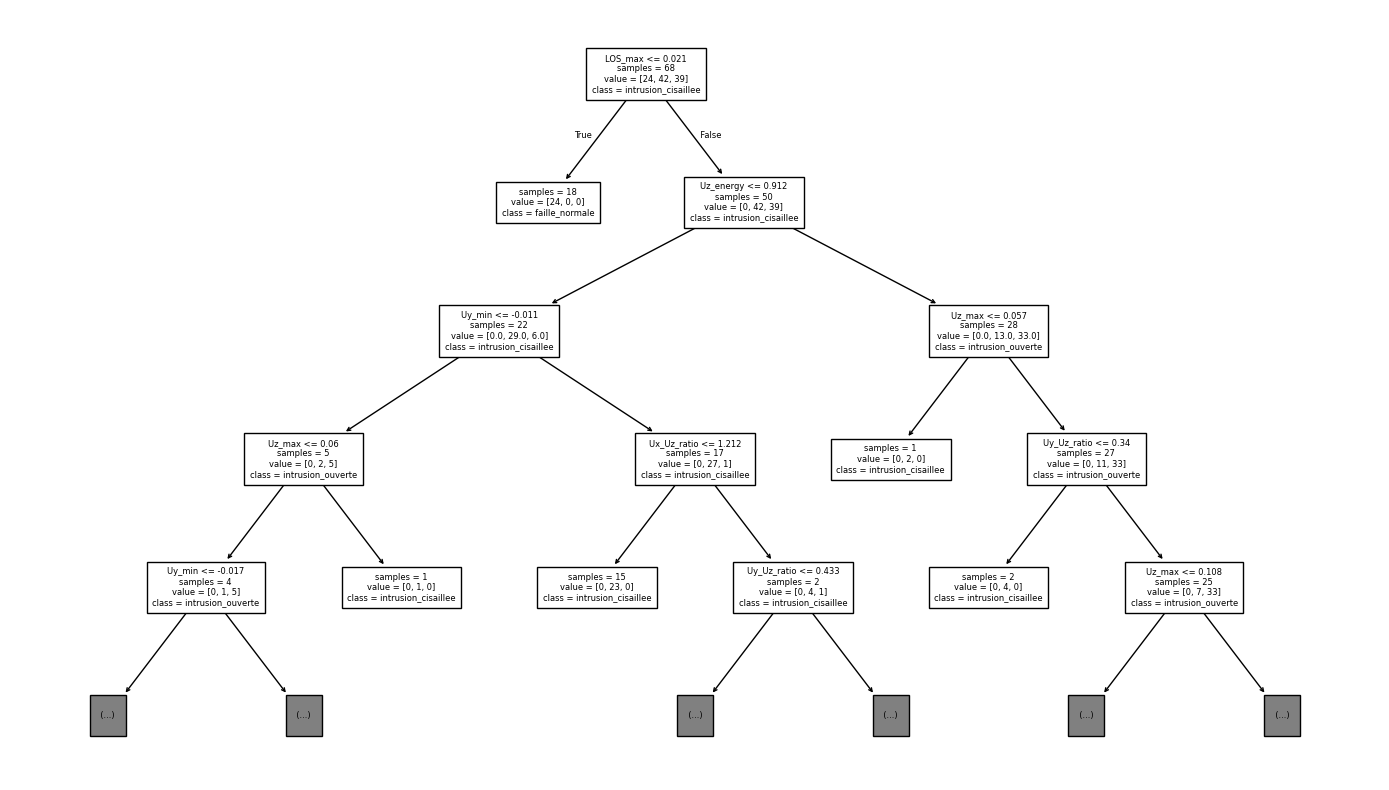

In [4]:
feat_cols = [c for c in df.columns if not c.startswith('phys_') and c != 'label']

X = df[feat_cols]
y = df['label']

rf_B, res_B = run_random_forest_experiment(
    X, y, experiment_name='B - disp + LOS'
)


## C. Displacement-only features (Ux, Uy, Uz)


=== C - displacement only ===
Classes: ['faille_normale' 'intrusion_cisaillee' 'intrusion_ouverte']
Confusion matrix:
 [[15  0  0]
 [ 0 11  4]
 [ 0  4 11]]

Classification report:

                     precision    recall  f1-score   support

     faille_normale       1.00      1.00      1.00        15
intrusion_cisaillee       0.73      0.73      0.73        15
  intrusion_ouverte       0.73      0.73      0.73        15

           accuracy                           0.82        45
          macro avg       0.82      0.82      0.82        45
       weighted avg       0.82      0.82      0.82        45



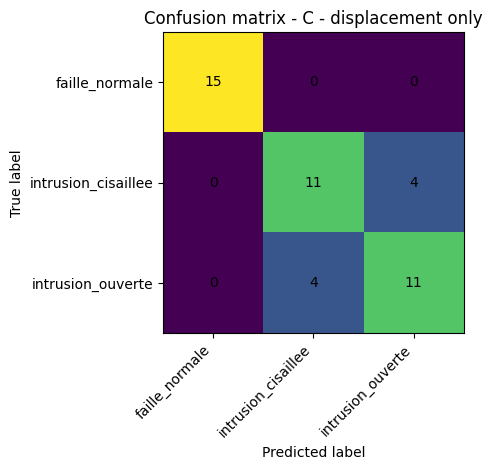


Top 10 features:
Uy_max               0.146
Uy_Uz_ratio          0.128
Ux_Uz_ratio          0.113
Uz_max               0.110
Ux_min               0.099
Ux_max               0.086
Uz_min               0.078
Ux_range             0.059
Uz_range             0.058
Uy_range             0.045


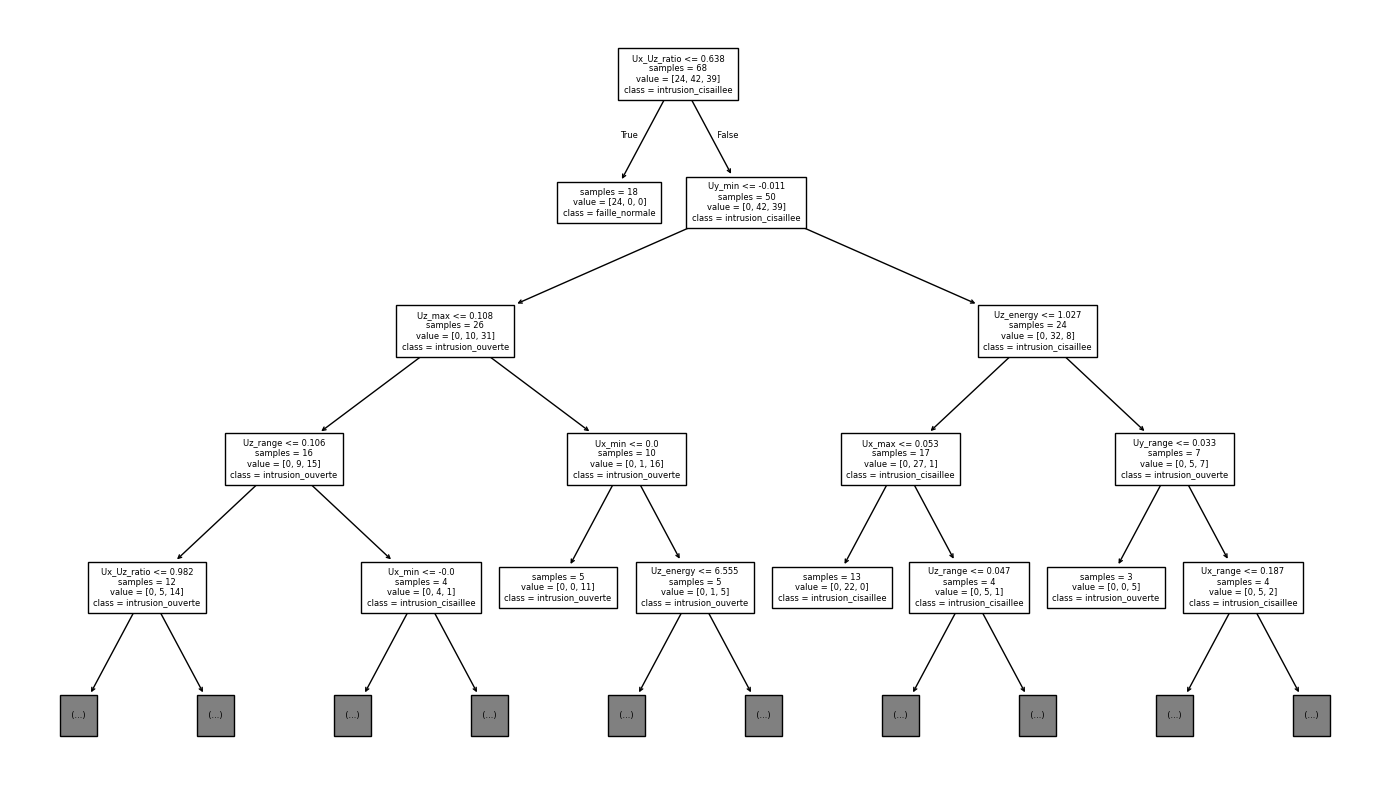

In [5]:
feat_cols = [
    'Ux_max', 'Uy_max', 'Uz_max',
    'Ux_min', 'Uy_min', 'Uz_min',
    'Ux_range', 'Uy_range', 'Uz_range',
    'Ux_Uz_ratio', 'Uy_Uz_ratio',
    'Uz_energy',
]

X = df[feat_cols]
y = df['label']

rf_C, res_C = run_random_forest_experiment(
    X, y, experiment_name='C - displacement only'
)


## D. LOS-only features


=== D - LOS only ===
Classes: ['faille_normale' 'intrusion_cisaillee' 'intrusion_ouverte']
Confusion matrix:
 [[15  0  0]
 [ 1  9  5]
 [ 0  2 13]]

Classification report:

                     precision    recall  f1-score   support

     faille_normale       0.94      1.00      0.97        15
intrusion_cisaillee       0.82      0.60      0.69        15
  intrusion_ouverte       0.72      0.87      0.79        15

           accuracy                           0.82        45
          macro avg       0.83      0.82      0.82        45
       weighted avg       0.83      0.82      0.82        45



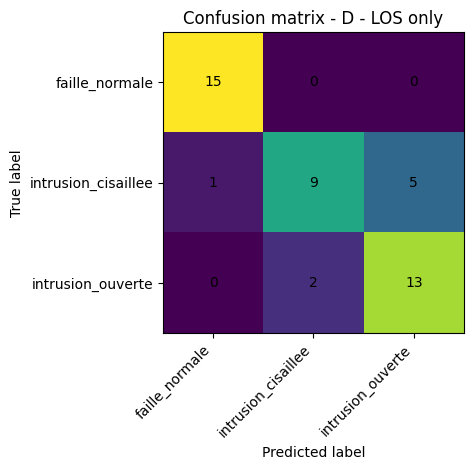


Top 10 features:
LOS_max              0.698
LOS_std              0.302


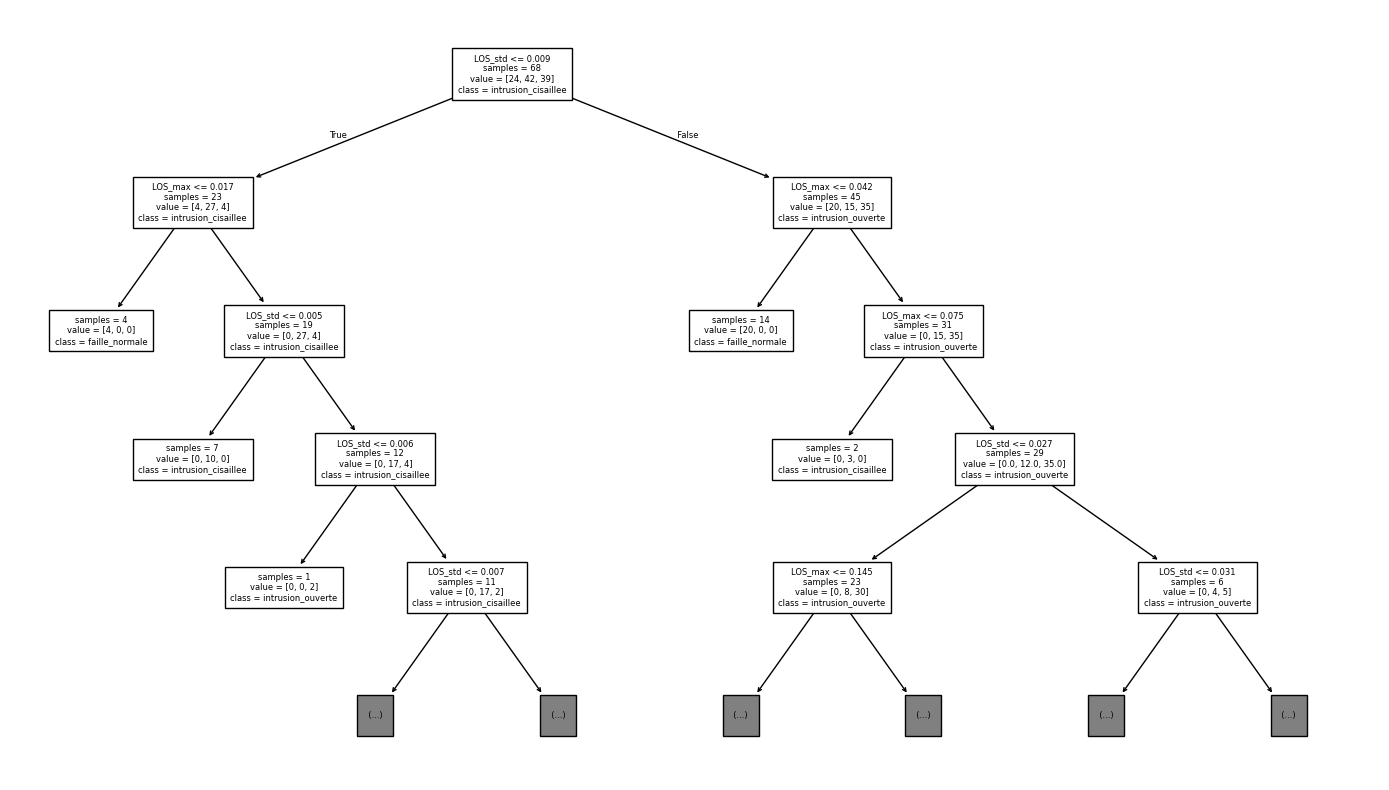

In [6]:
feat_cols = ['LOS_max', 'LOS_std']

X = df[feat_cols]
y = df['label']

rf_D, res_D = run_random_forest_experiment(
    X, y, experiment_name='D - LOS only'
)


In [7]:
res_A

{'confusion_matrix': array([[15,  0,  0],
        [ 0, 15,  0],
        [ 0,  1, 14]]),
 'y_test': 57       intrusion_ouverte
 113    intrusion_cisaillee
 83       intrusion_ouverte
 106    intrusion_cisaillee
 77       intrusion_ouverte
 90       intrusion_ouverte
 103    intrusion_cisaillee
 119    intrusion_cisaillee
 20          faille_normale
 91       intrusion_ouverte
 14          faille_normale
 38          faille_normale
 58       intrusion_ouverte
 66       intrusion_ouverte
 28          faille_normale
 98       intrusion_ouverte
 107    intrusion_cisaillee
 10          faille_normale
 23          faille_normale
 18          faille_normale
 147    intrusion_cisaillee
 7           faille_normale
 125    intrusion_cisaillee
 54       intrusion_ouverte
 88       intrusion_ouverte
 101    intrusion_cisaillee
 134    intrusion_cisaillee
 143    intrusion_cisaillee
 116    intrusion_cisaillee
 35          faille_normale
 84       intrusion_ouverte
 82       intrusion_ouverte
 135  

In [8]:
## E. Summary comparison of the four experiments
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

def summarize_results(name, res):
    y_test = res["y_test"]
    y_pred = res["y_pred"]
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    return {
        "experiment": name,
        "accuracy": acc,
        "f1_macro": f1_macro,
    }

summary_df = pd.DataFrame([
    summarize_results("A - all features", res_A),
    summarize_results("B - disp + LOS", res_B),
    summarize_results("C - displacement only", res_C),
    summarize_results("D - LOS only", res_D),
])

summary_df.sort_values("accuracy", ascending=False)


,experiment,accuracy,f1_macro
0,A - all features,0.977778,0.977753
1,B - disp + LOS,0.844444,0.844271
2,C - displacement only,0.822222,0.822222
3,D - LOS only,0.822222,0.815976
